In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
#heart.info()

In [13]:
#heart.isnull().sum()/heart.shape[0]*100

In [24]:
x_input = heart.iloc[::,:13]
y = heart.iloc[::,13:]

In [23]:
sc = StandardScaler()
x_scale = sc.fit_transform(x_input)

In [25]:
x = pd.DataFrame(x_scale)

In [27]:
k_lis = []
for i in range(1,30,2):
    k_lis.append(i)
k_lis

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.8, random_state = 0)

In [32]:
from sklearn.metrics import confusion_matrix

In [ ]:
mis_classification = []
for k in k_list:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    cm = confusion_matrix(prediction,y_test)
    mis_classification.append(cm.sum()-sum(np.diag(cm)))
mis_classification

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
mis_class = []
for k in k_lis:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    #accuracy = knn.accuracy_score(predict,y_test)
    cm = confusion_matrix(predict,y_test)
    mis_class.append(cm.sum() - sum(np.diag(cm)))
mis_class

[71, 52, 48, 45, 45, 43, 44, 42, 44, 43, 44, 41, 40, 43, 47]

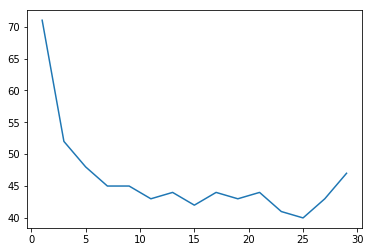

In [41]:
plt.plot(k_lis,mis_class)

In [42]:
knn1 = KNeighborsClassifier(n_neighbors = 25)
knn1.fit(x_train,y_train)
pred1 = knn1.predict(x_test)
cm = confusion_matrix(pred1,y_test)
cm

array([[ 80,  12],
       [ 28, 123]], dtype=int64)

In [ ]:
accu = metrics.accuracy_score(predict,y_test)

In [46]:
from sklearn import metrics
accuracy = metrics.accuracy_score(pred1,y_test)
accuracy

0.8353909465020576